In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sa
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_csv("synthetic_dog_breed_health_data.csv")

In [4]:
data

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,5.0,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,NaN,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,2.0,Yes,No,No,11.0,3.0,NaN,0.0,47.0,Yes,NaN
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,4.0,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,3.0,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Yorkshire Terrier,Small,Female,3.0,62.0,NaN,Active,Wet food,Wellness,3.0,No,No,No,12.0,3.0,Moderate,1.0,65.0,Yes,Yes
9996,9997,Dachshund,Small,Male,1.0,39.0,Neutered,Very Active,Special diet,Purina,2.0,No,No,Yes,13.0,0.0,NaN,0.0,54.0,Yes,NaN
9997,9998,German Shepherd,Large,NaN,10.0,40.0,Spayed,NaN,Hard food,Royal Canin,0.0,No,Yes,No,12.0,2.0,Very Active,1.0,60.0,Yes,NaN
9998,9999,Boxer,Medium,Female,13.0,57.0,Neutered,Moderate,Special diet,Hill's Science,1.0,No,No,Yes,9.0,2.0,NaN,0.0,53.0,Yes,No


In [5]:
i = data[data["Healthy"].isnull()==True].index

# to check of dataset

In [6]:
data.drop(i,inplace=True)

In [7]:
data

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,5.0,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,4.0,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,3.0,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No
5,6,Australian Shepherd,Medium,Female,2.0,42.0,NaN,Very Active,Wet food,Iams,0.0,Yes,No,No,11.0,3.0,NaN,2.0,85.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,Bulldog,Medium,Male,9.0,58.0,NaN,NaN,Hard food,Nutro,1.0,Yes,Yes,No,9.0,3.0,Moderate,0.0,65.0,Yes,No
9994,9995,Golden Retriever,Large,Female,6.0,48.0,NaN,Low,Wet food,Hill's Science,6.0,No,No,No,10.0,1.0,Low,3.0,70.0,Yes,Yes
9995,9996,Yorkshire Terrier,Small,Female,3.0,62.0,NaN,Active,Wet food,Wellness,3.0,No,No,No,12.0,3.0,Moderate,1.0,65.0,Yes,Yes
9998,9999,Boxer,Medium,Female,13.0,57.0,Neutered,Moderate,Special diet,Hill's Science,1.0,No,No,Yes,9.0,2.0,NaN,0.0,53.0,Yes,No


In [8]:
data["Sex"]

0         Male
2       Female
3         Male
4         Male
5       Female
         ...  
9993      Male
9994    Female
9995    Female
9998    Female
9999      Male
Name: Sex, Length: 9678, dtype: object

In [9]:
data.shape

(9678, 21)

In [10]:
data["Sex"].value_counts()

Sex
Male      4737
Female    4625
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9678 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9678 non-null   int64  
 1   Breed                        9399 non-null   object 
 2   Breed Size                   9400 non-null   object 
 3   Sex                          9362 non-null   object 
 4   Age                          9393 non-null   float64
 5   Weight (lbs)                 9401 non-null   float64
 6   Spay/Neuter Status           6237 non-null   object 
 7   Daily Activity Level         7522 non-null   object 
 8   Diet                         9387 non-null   object 
 9   Food Brand                   9386 non-null   object 
 10  Daily Walk Distance (miles)  9392 non-null   float64
 11  Other Pets in Household      9390 non-null   object 
 12  Medications                  9436 non-null   object 
 13  Seizures               

In [12]:
data.describe()

,ID,Age,Weight (lbs),Daily Walk Distance (miles),Hours of Sleep,Play Time (hrs),Annual Vet Visits,Average Temperature (F)
count,9678.000000,9393.000000,9401.000000,9392.000000,9408.000000,9377.000000,9379.000000,9345.000000
mean,5000.300165,7.060683,50.223912,2.527577,11.001594,1.525861,1.474038,64.569502
std,2887.766902,3.754376,14.901805,1.457555,1.463310,0.980069,1.151206,14.846789
min,1.000000,1.000000,10.000000,0.000000,8.000000,0.000000,0.000000,30.000000
25%,2500.250000,4.000000,40.000000,1.750000,10.000000,1.000000,1.000000,54.000000
50%,4995.500000,7.000000,50.000000,3.000000,11.000000,2.000000,1.000000,64.000000
75%,7506.750000,10.000000,60.000000,3.000000,12.000000,2.000000,2.000000,75.000000
max,10000.000000,13.000000,109.000000,8.000000,14.000000,4.000000,4.000000,100.000000


In [13]:
data.describe(include="object")

,Breed,Breed Size,Sex,Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Other Pets in Household,Medications,Seizures,Owner Activity Level,Synthetic,Healthy
count,9399,9400,9362,6237,7522,9387,9386,9390,9436,9389,7527,9376,9678
unique,15,3,2,2,4,4,9,2,2,2,4,1,2
top,Bulldog,Large,Male,Spayed,Active,Wet food,Special,No,No,No,Very Active,Yes,Yes
freq,668,3707,4737,3127,1900,2433,2411,4779,4778,8922,1928,9376,7178


In [14]:
data["Sex"].unique()

array(['Male', 'Female', nan], dtype=object)

# cheaking duplicates

In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
9993    False
9994    False
9995    False
9998    False
9999    False
Length: 9678, dtype: bool

In [17]:
data[data.duplicated()==True]

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy


In [18]:
data[data.duplicated()==True]

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy


In [19]:
data

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,5.0,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,4.0,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,3.0,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No
5,6,Australian Shepherd,Medium,Female,2.0,42.0,NaN,Very Active,Wet food,Iams,0.0,Yes,No,No,11.0,3.0,NaN,2.0,85.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,Bulldog,Medium,Male,9.0,58.0,NaN,NaN,Hard food,Nutro,1.0,Yes,Yes,No,9.0,3.0,Moderate,0.0,65.0,Yes,No
9994,9995,Golden Retriever,Large,Female,6.0,48.0,NaN,Low,Wet food,Hill's Science,6.0,No,No,No,10.0,1.0,Low,3.0,70.0,Yes,Yes
9995,9996,Yorkshire Terrier,Small,Female,3.0,62.0,NaN,Active,Wet food,Wellness,3.0,No,No,No,12.0,3.0,Moderate,1.0,65.0,Yes,Yes
9998,9999,Boxer,Medium,Female,13.0,57.0,Neutered,Moderate,Special diet,Hill's Science,1.0,No,No,Yes,9.0,2.0,NaN,0.0,53.0,Yes,No


In [20]:
data[data.duplicated()==True].index

Index([], dtype='int64')

In [21]:
data.drop("ID",axis=1,inplace=True)

In [22]:
data.isnull().sum()

Breed                           279
Breed Size                      278
Sex                             316
Age                             285
Weight (lbs)                    277
Spay/Neuter Status             3441
Daily Activity Level           2156
Diet                            291
Food Brand                      292
Daily Walk Distance (miles)     286
Other Pets in Household         288
Medications                     242
Seizures                        289
Hours of Sleep                  270
Play Time (hrs)                 301
Owner Activity Level           2151
Annual Vet Visits               299
Average Temperature (F)         333
Synthetic                       302
Healthy                           0
dtype: int64

In [23]:
data.select_dtypes(include="object").columns

Index(['Breed', 'Breed Size', 'Sex', 'Spay/Neuter Status',
       'Daily Activity Level', 'Diet', 'Food Brand', 'Other Pets in Household',
       'Medications', 'Seizures', 'Owner Activity Level', 'Synthetic',
       'Healthy'],
      dtype='object')

In [24]:
import seaborn as sns

In [25]:
data

,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,5.0,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
2,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,4.0,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,3.0,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No
5,Australian Shepherd,Medium,Female,2.0,42.0,NaN,Very Active,Wet food,Iams,0.0,Yes,No,No,11.0,3.0,NaN,2.0,85.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Bulldog,Medium,Male,9.0,58.0,NaN,NaN,Hard food,Nutro,1.0,Yes,Yes,No,9.0,3.0,Moderate,0.0,65.0,Yes,No
9994,Golden Retriever,Large,Female,6.0,48.0,NaN,Low,Wet food,Hill's Science,6.0,No,No,No,10.0,1.0,Low,3.0,70.0,Yes,Yes
9995,Yorkshire Terrier,Small,Female,3.0,62.0,NaN,Active,Wet food,Wellness,3.0,No,No,No,12.0,3.0,Moderate,1.0,65.0,Yes,Yes
9998,Boxer,Medium,Female,13.0,57.0,Neutered,Moderate,Special diet,Hill's Science,1.0,No,No,Yes,9.0,2.0,NaN,0.0,53.0,Yes,No


In [26]:
data["Healthy"]= data["Healthy"].astype("object")

# Filling Null Values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x= data.drop("Healthy",axis=1)
y = data["Healthy"]

In [29]:
xtrain ,xtest , ytrain  , ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [30]:
xtrain.isnull().sum()/xtrain.shape[0]*100

Breed                           2.893309
Breed Size                      2.919142
Sex                             3.190390
Age                             2.932059
Weight (lbs)                    2.802893
Spay/Neuter Status             35.585120
Daily Activity Level           22.397313
Diet                            3.112891
Food Brand                      3.099974
Daily Walk Distance (miles)     2.906226
Other Pets in Household         2.932059
Medications                     2.596228
Seizures                        2.944975
Hours of Sleep                  2.712477
Play Time (hrs)                 3.216223
Owner Activity Level           22.138982
Annual Vet Visits               2.983725
Average Temperature (F)         3.655386
Synthetic                       3.229140
dtype: float64

In [31]:
xtrain

,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic
1395,Bulldog,Medium,Female,13.0,30.0,Spayed,NaN,Wet food,Blue Buffalo,3.0,Yes,Yes,No,10.0,0.0,NaN,4.0,49.0,Yes
516,Rottweiler,Large,Female,10.0,65.0,NaN,NaN,Hard food,Nutro,2.0,No,Yes,No,10.0,2.0,Moderate,2.0,79.0,NaN
2438,Yorkshire Terrier,Small,Male,7.0,11.0,NaN,Very Active,Home cooked,Special,1.0,Yes,No,No,13.0,0.0,Low,1.0,86.0,Yes
8060,Bulldog,Medium,Female,10.0,78.0,Neutered,Active,Home cooked,Special,1.0,No,Yes,No,12.0,2.0,Low,1.0,45.0,Yes
6022,Bulldog,Medium,Male,5.0,81.0,Spayed,Moderate,Special diet,Purina,6.0,Yes,No,No,10.0,0.0,Moderate,1.0,39.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,Doberman,Large,Female,6.0,63.0,Spayed,Moderate,Special diet,Pedigree,6.0,No,No,No,12.0,1.0,NaN,2.0,71.0,Yes
7659,Doberman,Large,Male,6.0,10.0,Spayed,Active,Wet food,Hill's Science,4.0,No,Yes,No,8.0,2.0,Active,0.0,63.0,Yes
3434,Australian Shepherd,Medium,Female,4.0,39.0,Spayed,Very Active,Home cooked,NaN,4.0,No,Yes,Yes,10.0,2.0,Moderate,0.0,72.0,Yes
9925,Golden Retriever,Large,Male,1.0,50.0,NaN,NaN,Home cooked,Special,2.0,No,No,No,10.0,2.0,Very Active,0.0,48.0,Yes


In [32]:
for i in xtrain.select_dtypes(include="object"):
    xtrain[i].fillna(xtrain[i].mode()[0],inplace=True)
    xtest[i].fillna(xtrain[i].mode()[0],inplace=True)
    

In [33]:
for i in xtrain.select_dtypes(exclude="object"):
    xtrain[i].fillna(xtrain[i].mean(),inplace=True)
    xtest[i].fillna(xtrain[i].mean(),inplace=True)
    

<Axes: ylabel='Healthy'>

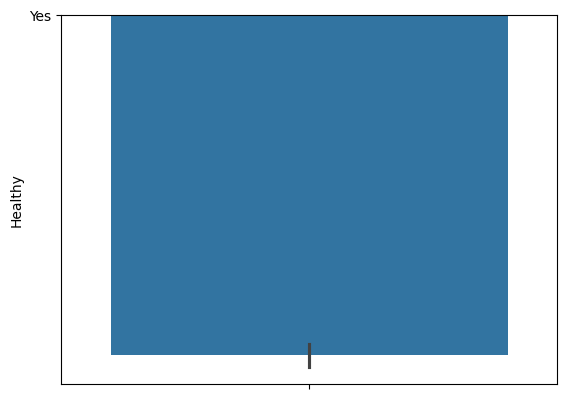

In [34]:
sns.barplot(data=data,y="Healthy")

<Axes: xlabel='Healthy'>

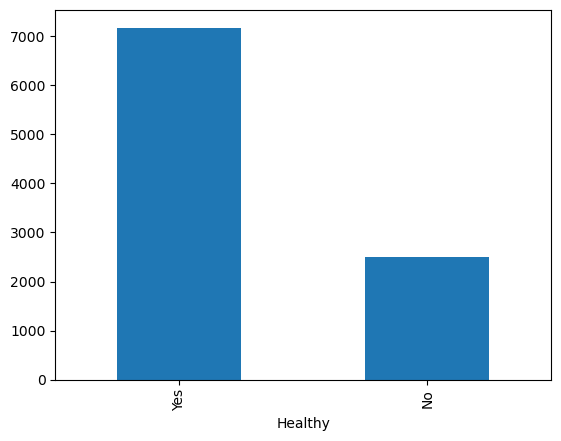

In [35]:
data["Healthy"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

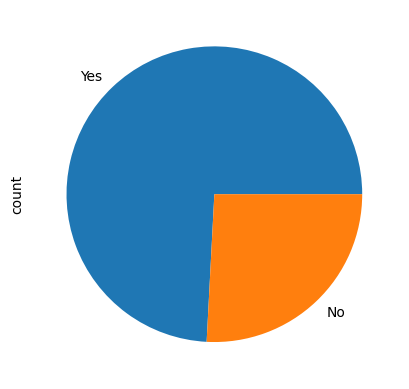

In [36]:
data["Healthy"].value_counts().plot(kind="pie")

<Axes: xlabel='Healthy', ylabel='Breed'>

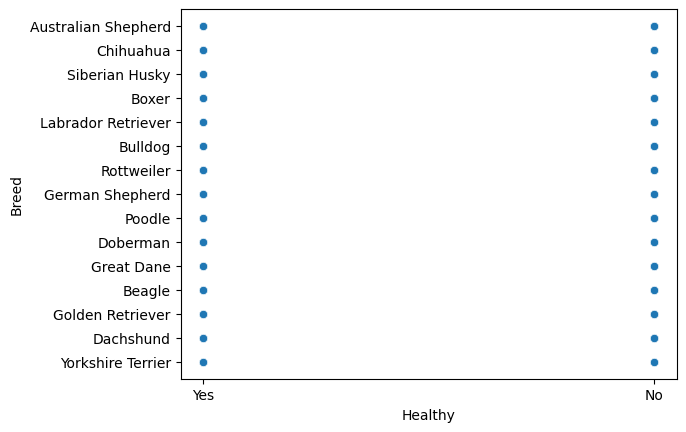

In [37]:
sns.scatterplot(data=data,x="Healthy",y="Breed")

<Axes: >

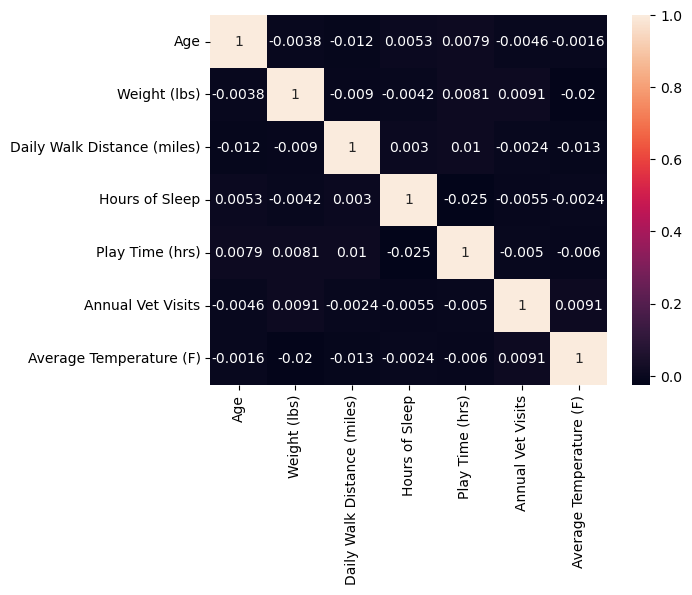

In [38]:
sns.heatmap(data.select_dtypes(exclude="object").corr(),annot=True)

In [39]:
import matplotlib.pyplot as plt

In [40]:
ytrain.shape , ytest.shape

((7742,), (1936,))

In [41]:
xtrain.isnull().sum()/xtrain.shape[0]*100

Breed                          0.0
Breed Size                     0.0
Sex                            0.0
Age                            0.0
Weight (lbs)                   0.0
Spay/Neuter Status             0.0
Daily Activity Level           0.0
Diet                           0.0
Food Brand                     0.0
Daily Walk Distance (miles)    0.0
Other Pets in Household        0.0
Medications                    0.0
Seizures                       0.0
Hours of Sleep                 0.0
Play Time (hrs)                0.0
Owner Activity Level           0.0
Annual Vet Visits              0.0
Average Temperature (F)        0.0
Synthetic                      0.0
dtype: float64

In [42]:
xtest.isnull().sum()/xtest.shape[0]*100

Breed                          0.0
Breed Size                     0.0
Sex                            0.0
Age                            0.0
Weight (lbs)                   0.0
Spay/Neuter Status             0.0
Daily Activity Level           0.0
Diet                           0.0
Food Brand                     0.0
Daily Walk Distance (miles)    0.0
Other Pets in Household        0.0
Medications                    0.0
Seizures                       0.0
Hours of Sleep                 0.0
Play Time (hrs)                0.0
Owner Activity Level           0.0
Annual Vet Visits              0.0
Average Temperature (F)        0.0
Synthetic                      0.0
dtype: float64

# Outlier treatment

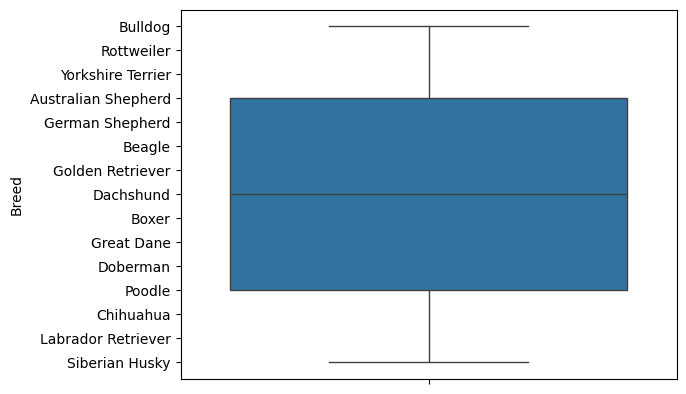

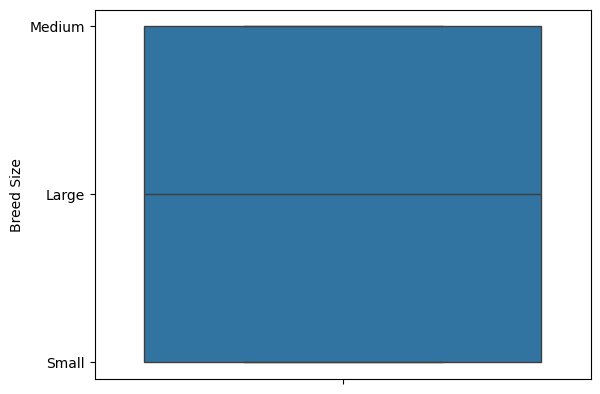

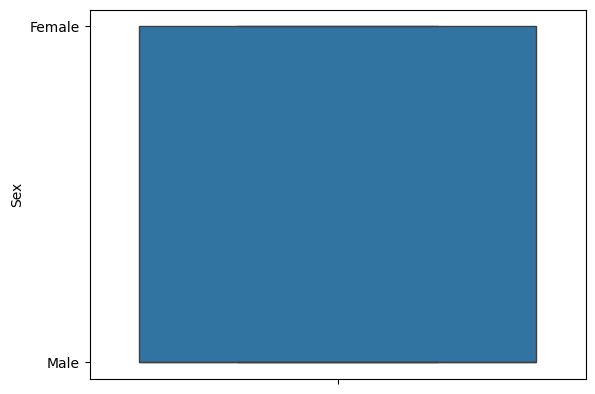

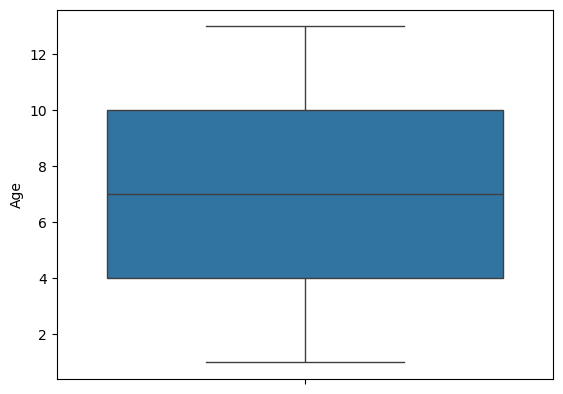

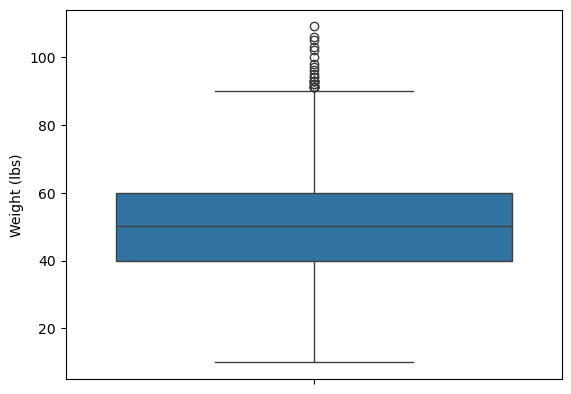

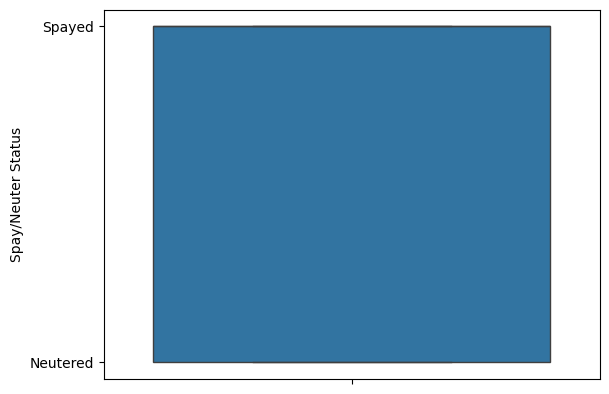

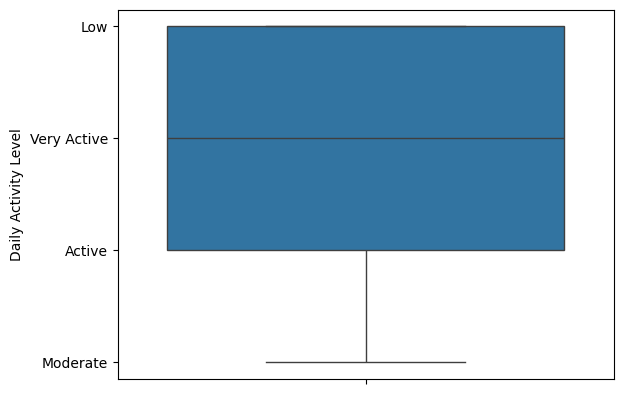

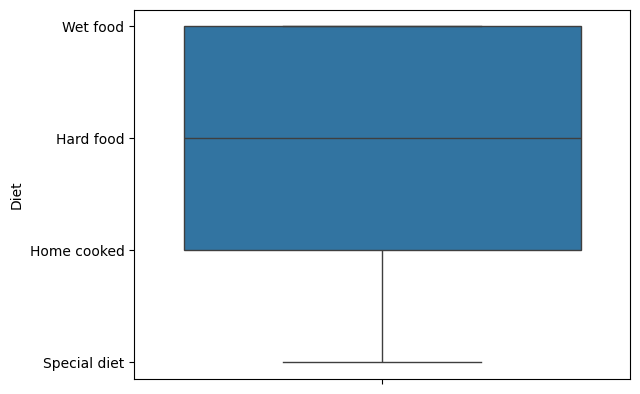

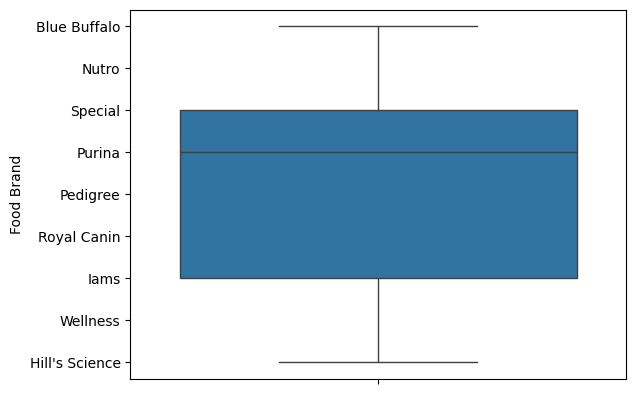

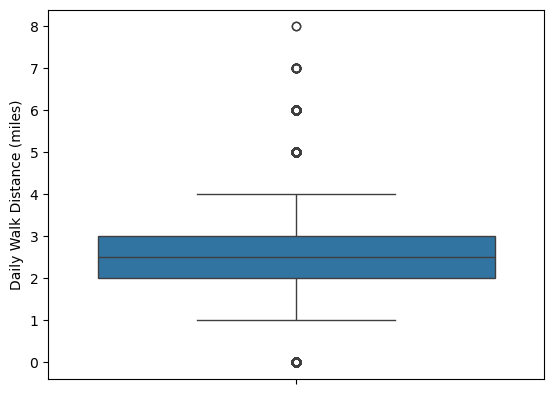

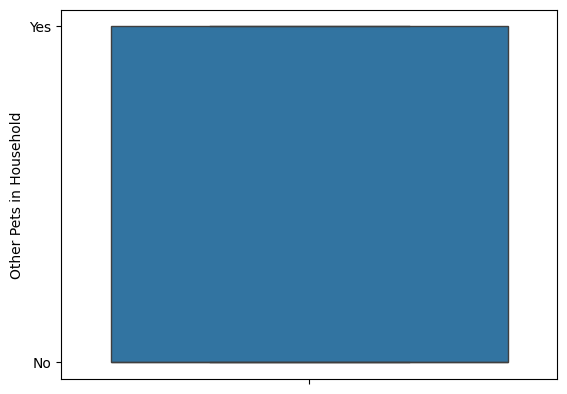

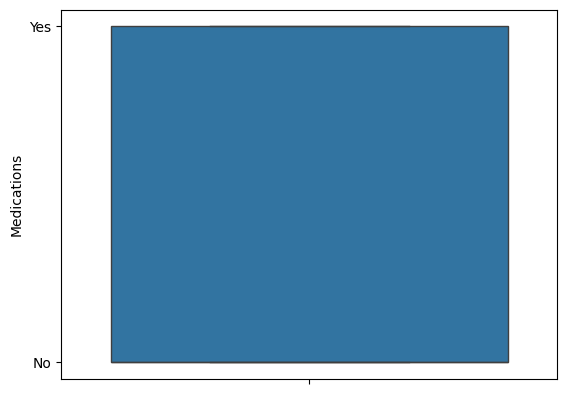

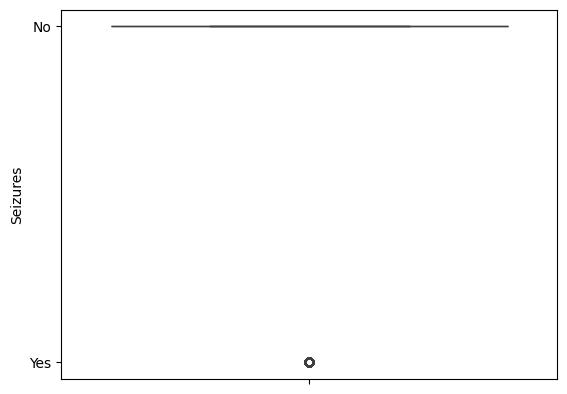

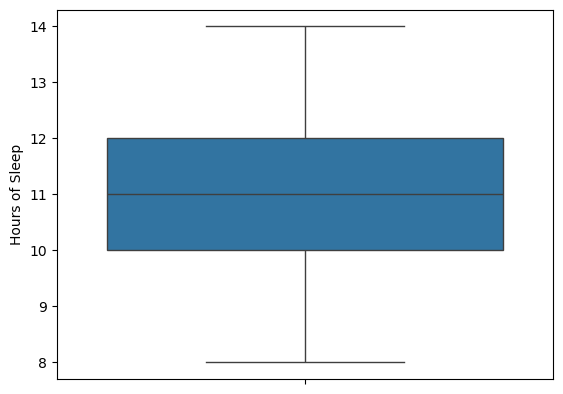

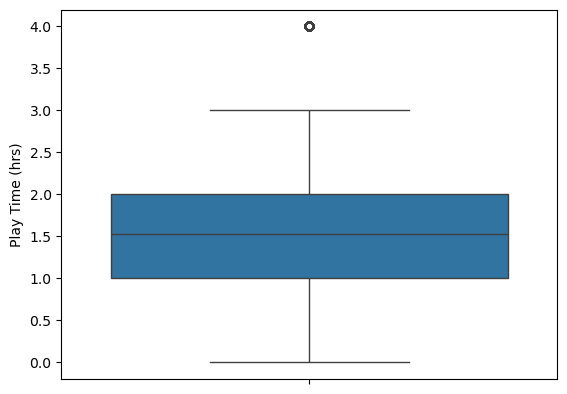

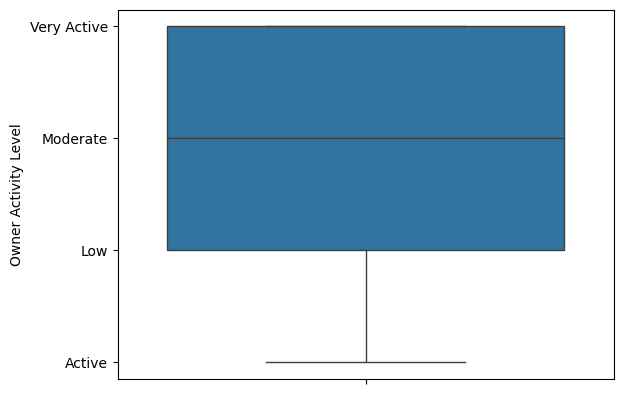

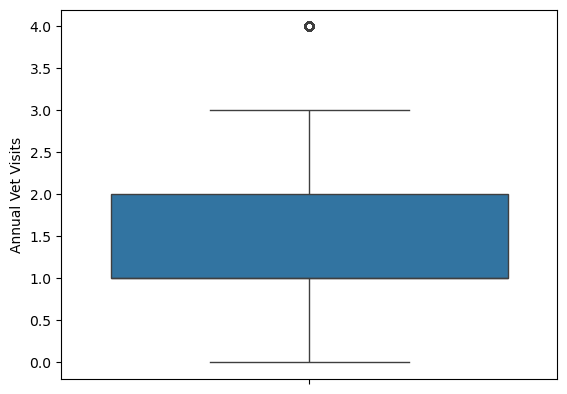

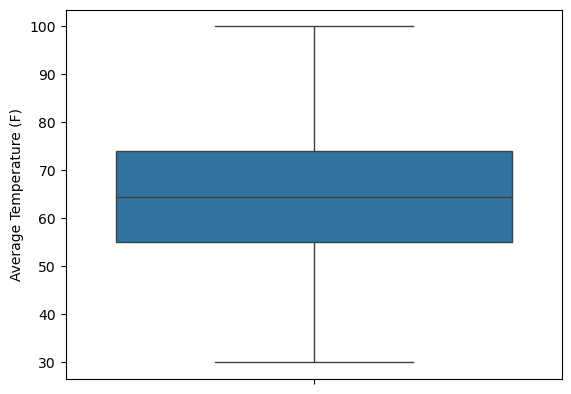

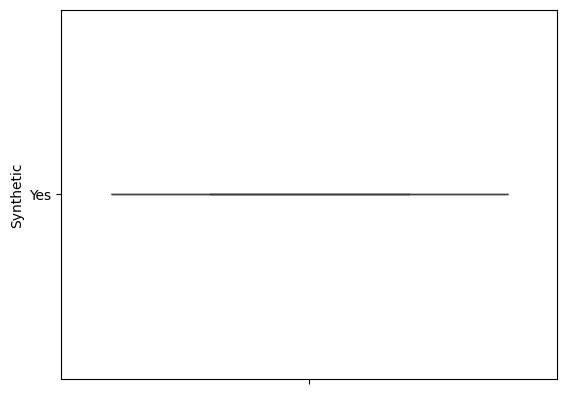

In [43]:
for i in xtrain.columns:
    sns.boxplot(xtrain[i])
    plt.show()

In [44]:

columns = xtrain.select_dtypes(include=['int64', 'float64']).columns

# Outlier treatment using IQR method
for i in columns:
    q1 = xtrain[i].quantile(0.25)
    q3 = xtrain[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    
    # Capping outliers
    xtrain[i] = xtrain[i].apply(lambda x: lower if x < lower else upper if x > upper else x)

xtrain.head()


,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic
1395,Bulldog,Medium,Female,13.0,30.0,Spayed,Low,Wet food,Blue Buffalo,3.0,Yes,Yes,No,10.0,0.0,Very Active,3.5,49.0,Yes
516,Rottweiler,Large,Female,10.0,65.0,Spayed,Low,Hard food,Nutro,2.0,No,Yes,No,10.0,2.0,Moderate,2.0,79.0,Yes
2438,Yorkshire Terrier,Small,Male,7.0,11.0,Spayed,Very Active,Home cooked,Special,1.0,Yes,No,No,13.0,0.0,Low,1.0,86.0,Yes
8060,Bulldog,Medium,Female,10.0,78.0,Neutered,Active,Home cooked,Special,1.0,No,Yes,No,12.0,2.0,Low,1.0,45.0,Yes
6022,Bulldog,Medium,Male,5.0,81.0,Spayed,Moderate,Special diet,Purina,4.5,Yes,No,No,10.0,0.0,Moderate,1.0,39.0,Yes


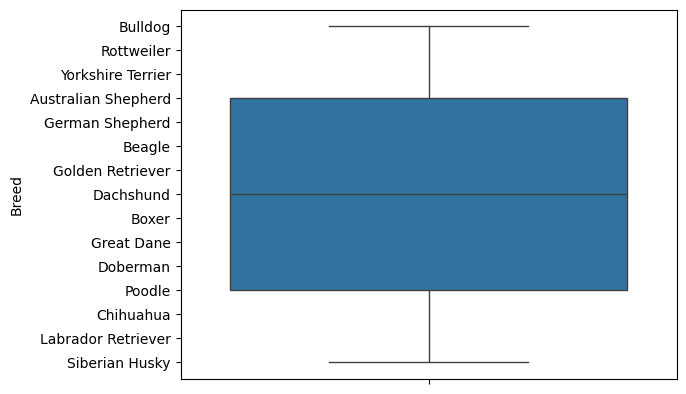

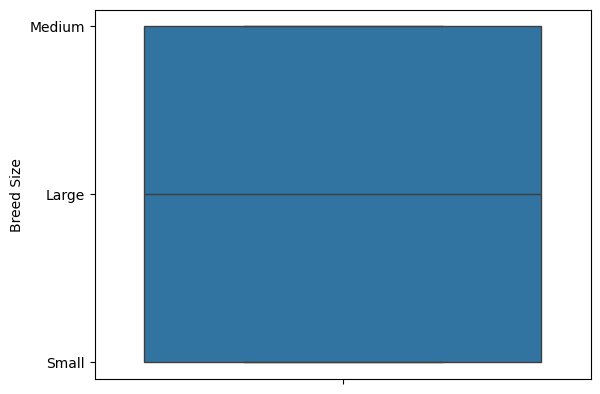

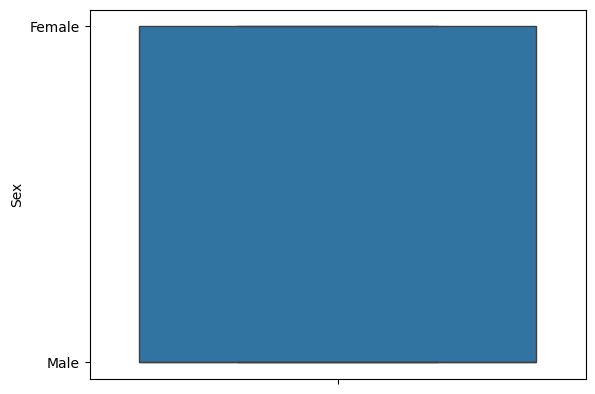

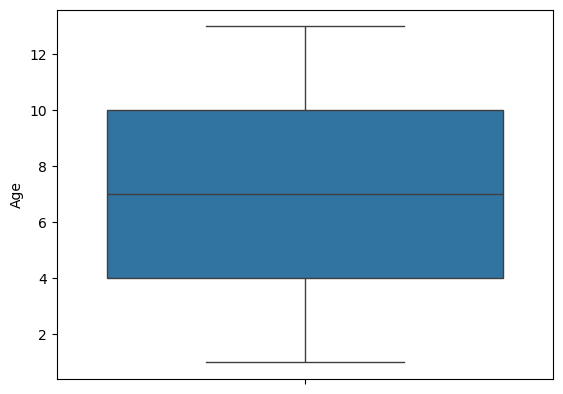

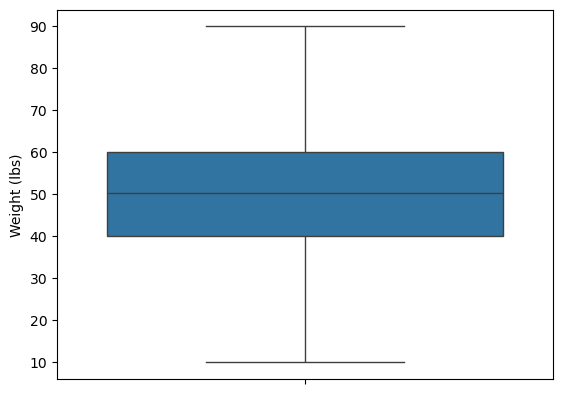

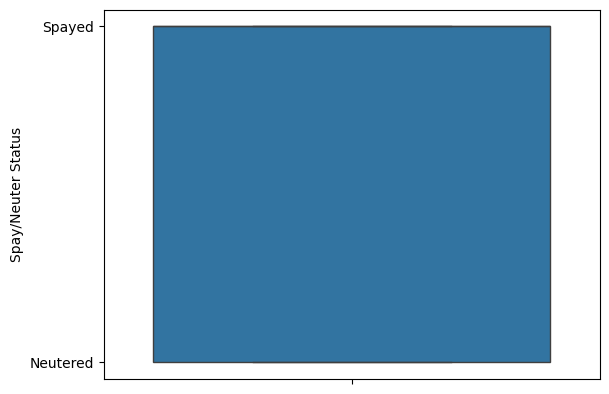

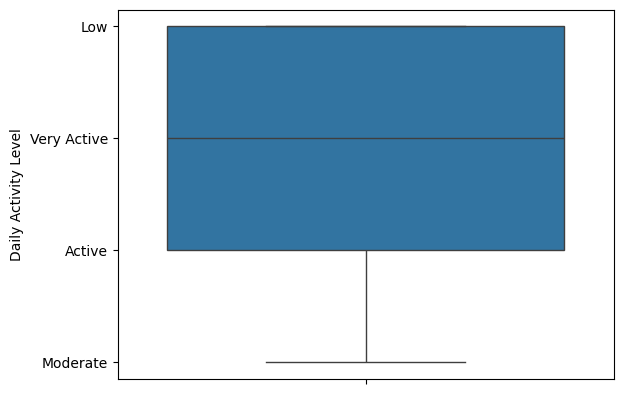

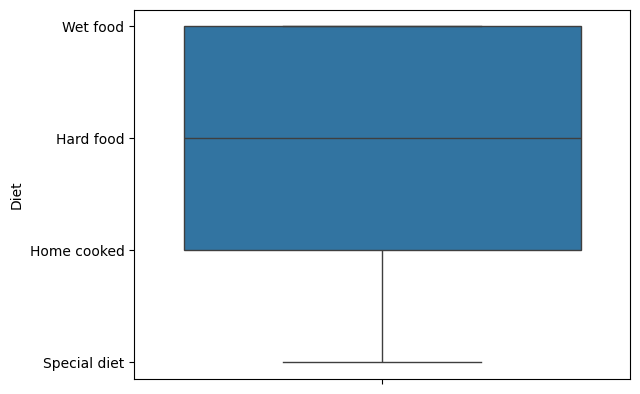

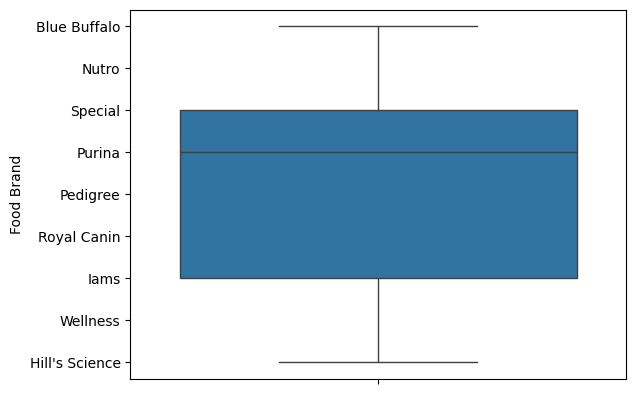

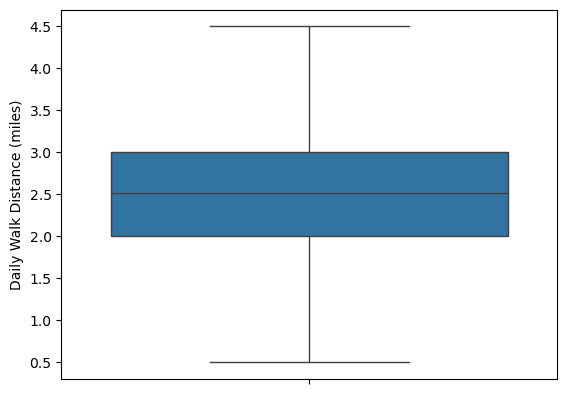

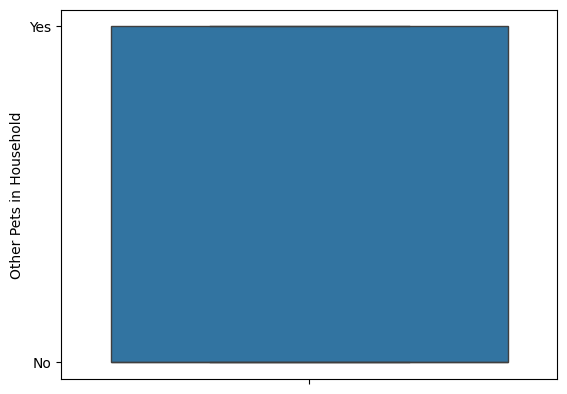

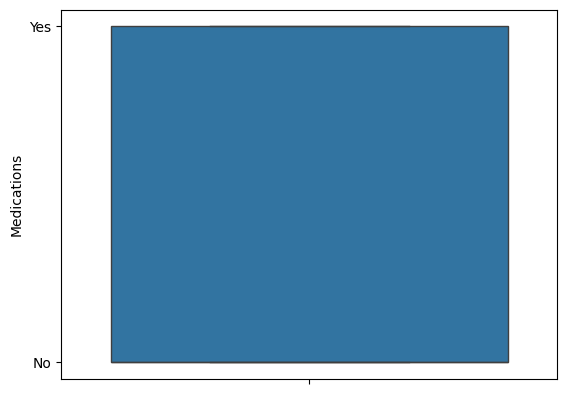

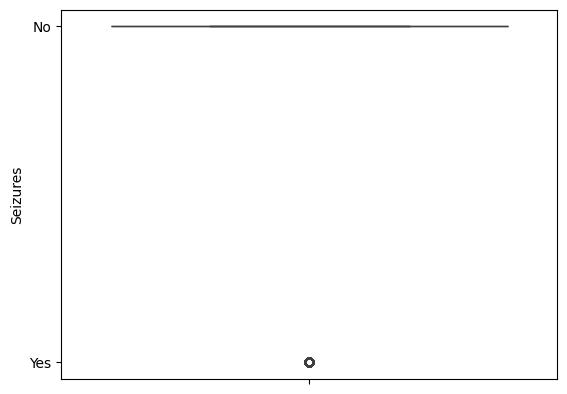

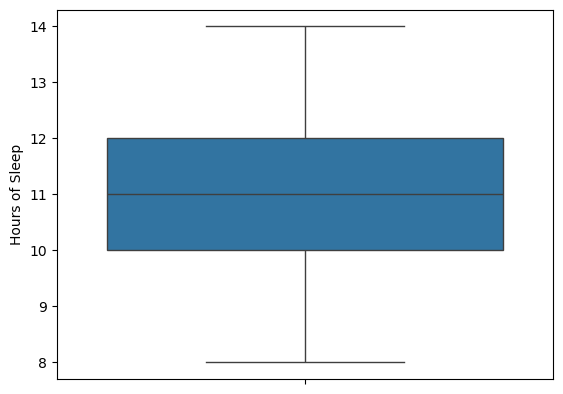

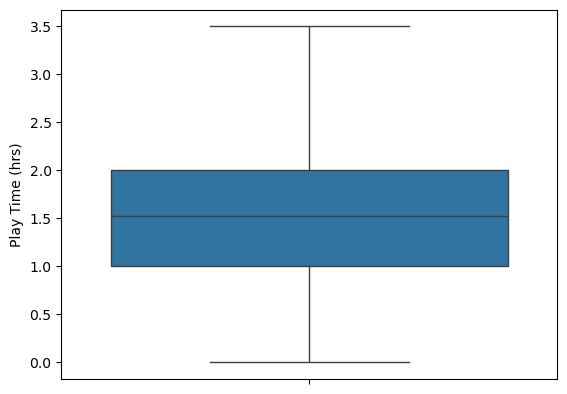

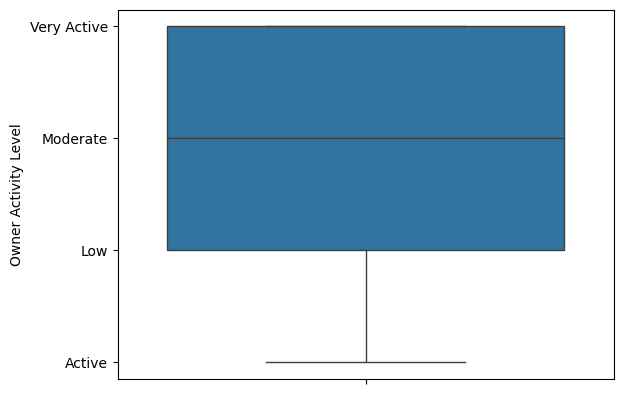

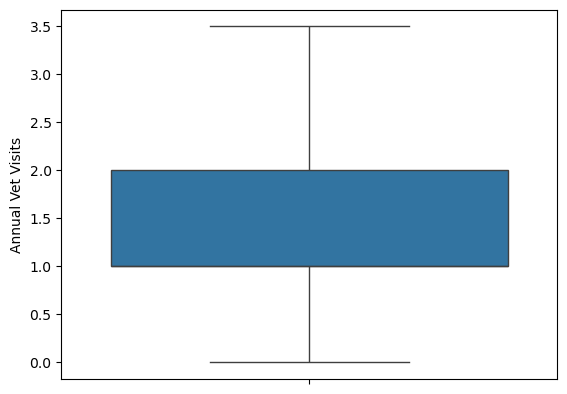

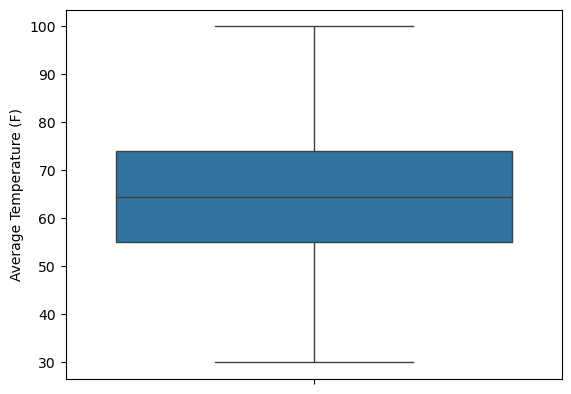

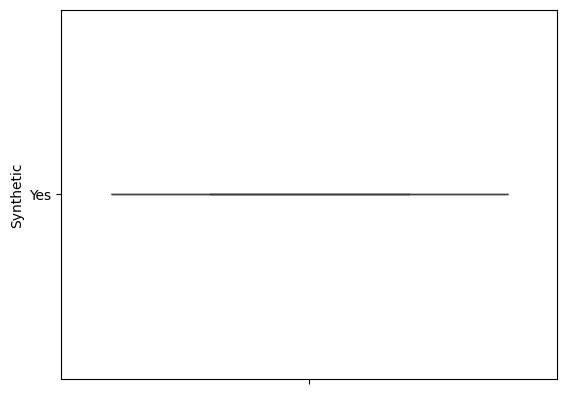

In [45]:
for i in xtrain.columns:
    sns.boxplot(xtrain[i])
    plt.show()

# Encoding

In [46]:
xtest["Breed Size"].value_counts()

Breed Size
Large     790
Small     629
Medium    517
Name: count, dtype: int64

In [47]:
xtrain["Breed Size"]=xtrain["Breed Size"].apply(lambda x:1 if x=="Large" else 0)


In [48]:
xtest["Breed Size"]=xtest["Breed Size"].apply(lambda x:1 if x=="Large" else 0)


In [49]:
xtrain["Breed Size"].value_counts()

Breed Size
0    4547
1    3195
Name: count, dtype: int64

In [50]:
xtest["Breed Size"].value_counts()

Breed Size
0    1146
1     790
Name: count, dtype: int64

In [51]:
xtest["Diet"].value_counts()

Diet
Wet food        547
Home cooked     482
Hard food       474
Special diet    433
Name: count, dtype: int64

In [52]:
xtrain["Diet"]=xtrain["Diet"].apply(lambda x:1 if x=="Home cooked" else 2 if x=="Hard food" else 3)
xtest["Diet"]=xtest["Diet"].apply(lambda x:1 if x=="Home cooked" else 2 if x=="Hard food" else 3)



In [53]:
xtest["Diet"].value_counts()

Diet
3    980
1    482
2    474
Name: count, dtype: int64

In [54]:
xtrain["Diet"].value_counts()

Diet
3    3988
1    1917
2    1837
Name: count, dtype: int64

In [55]:
xtrain["Breed"].value_counts()

Breed
Dachshund              760
Bulldog                534
Beagle                 531
Australian Shepherd    512
Golden Retriever       509
Doberman               502
Boxer                  498
Siberian Husky         496
Chihuahua              494
Labrador Retriever     492
Rottweiler             490
Poodle                 490
Great Dane             481
German Shepherd        477
Yorkshire Terrier      476
Name: count, dtype: int64

In [56]:
train_en_cl=pd.get_dummies(xtrain["Breed"]).astype("int64")

In [57]:
test_en_cl=pd.get_dummies(xtest["Breed"]).astype("int64")

In [58]:
xtrain = pd.concat([train_en_cl,xtrain],axis=1)

In [59]:
xtest = pd.concat([test_en_cl,xtest],axis=1)

In [60]:
xtest

,Australian Shepherd,Beagle,Boxer,Bulldog,Chihuahua,Dachshund,Doberman,German Shepherd,Golden Retriever,Great Dane,Labrador Retriever,Poodle,Rottweiler,Siberian Husky,Yorkshire Terrier,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic
6265,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Labrador Retriever,1,Female,1.0,37.0,Spayed,Very Active,2,Hill's Science,0.000000,Yes,No,No,12.000000,4.0,Very Active,1.0,68.0,Yes
5294,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,German Shepherd,1,Female,13.0,70.0,Spayed,Low,3,Blue Buffalo,3.000000,No,No,Yes,11.000000,1.0,Very Active,1.0,83.0,Yes
2453,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Poodle,0,Male,7.0,52.0,Spayed,Very Active,3,Blue Buffalo,1.000000,No,No,No,10.990972,2.0,Low,1.0,69.0,Yes
3890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Australian Shepherd,0,Female,11.0,61.0,Neutered,Active,1,Special,0.000000,No,No,No,8.000000,3.0,Low,0.0,78.0,Yes
8981,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,German Shepherd,1,Male,1.0,34.0,Spayed,Moderate,3,Iams,3.000000,No,No,No,12.000000,0.0,Very Active,0.0,78.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Golden Retriever,1,Male,5.0,41.0,Spayed,Low,1,Special,0.000000,Yes,Yes,No,13.000000,1.0,Very Active,3.0,44.0,Yes
6504,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Golden Retriever,1,Female,9.0,43.0,Spayed,Very Active,1,Special,3.000000,Yes,No,No,10.990972,0.0,Active,2.0,62.0,Yes
8056,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Doberman,1,Male,5.0,61.0,Neutered,Moderate,1,Special,4.000000,Yes,No,No,13.000000,2.0,Very Active,3.0,61.0,Yes
9071,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,German Shepherd,1,Male,13.0,37.0,Neutered,Low,1,Special,2.000000,No,Yes,No,11.000000,2.0,Moderate,0.0,77.0,Yes


In [61]:
xtest.drop("Breed",axis=1,inplace=True)

In [62]:
xtrain.head(1)

,Australian Shepherd,Beagle,Boxer,Bulldog,Chihuahua,Dachshund,Doberman,German Shepherd,Golden Retriever,Great Dane,Labrador Retriever,Poodle,Rottweiler,Siberian Husky,Yorkshire Terrier,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic
1395,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Bulldog,0,Female,13.0,30.0,Spayed,Low,3,Blue Buffalo,3.0,Yes,Yes,No,10.0,0.0,Very Active,3.5,49.0,Yes


# Dropping

In [63]:
xtrain.drop("Breed",axis=1,inplace=True)

In [64]:
xtrain.drop("Breed Size",axis=1,inplace=True)

In [65]:
xtrain.drop("Diet",axis=1,inplace=True)

In [66]:
xtrain.drop("Sex",axis=1,inplace=True)

In [88]:
xtrain.drop("Age",axis=1,inplace=True)

In [68]:
xtrain.drop("Weight (lbs)",axis=1,inplace=True)

In [69]:
xtrain.drop("Spay/Neuter Status",axis=1,inplace=True)

In [71]:
xtrain.drop("Daily Activity Level",axis=1,inplace=True)

In [72]:
xtrain.drop("Food Brand",axis=1,inplace=True)

In [73]:
xtrain.drop("Daily Walk Distance (miles)",axis=1,inplace=True)

In [75]:
xtrain.drop("Other Pets in Household",axis=1,inplace=True)

In [85]:
xtrain.drop("Medications",axis=1,inplace=True)

In [76]:
xtrain.drop("Seizures",axis=1,inplace=True)

In [87]:
xtrain.drop("Hours of Sleep",axis=1,inplace=True)

In [77]:
xtrain.drop("Play Time (hrs)",axis=1,inplace=True)

In [78]:
xtrain.drop("Owner Activity Level",axis=1,inplace=True)

In [80]:
xtrain.drop("Annual Vet Visits",axis=1,inplace=True)

In [81]:
xtrain.drop("Average Temperature (F)",axis=1,inplace=True)

In [82]:
xtrain.drop("Synthetic",axis=1,inplace=True)

In [89]:
xtrain

,Australian Shepherd,Beagle,Boxer,Bulldog,Chihuahua,Dachshund,Doberman,German Shepherd,Golden Retriever,Great Dane,Labrador Retriever,Poodle,Rottweiler,Siberian Husky,Yorkshire Terrier
1395,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8060,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6022,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7659,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9925,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
ytrain

1395     No
516      No
2438    Yes
8060    Yes
6022    Yes
       ... 
3838    Yes
7659     No
3434    Yes
9925     No
5972    Yes
Name: Healthy, Length: 7742, dtype: object

In [91]:
import statsmodels.api as sa

In [92]:
xtrain_c= sa.add_constant(xtrain)

In [93]:
xtest_c= sa.add_constant(xtest)

In [106]:
ytrain = ytrain.astype("int")

ValueError: invalid literal for int() with base 10: 'No'

In [107]:
ytest = ytest.astype("int")

ValueError: invalid literal for int() with base 10: 'Yes'

In [104]:
model = sa.Logit(ytrain,xtrain_c).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [103]:
model.summary()

NameError: name 'model' is not defined